<a href="https://colab.research.google.com/github/omarbrandan/taller-programacion-1/blob/main/TF1_Py_BRANDAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

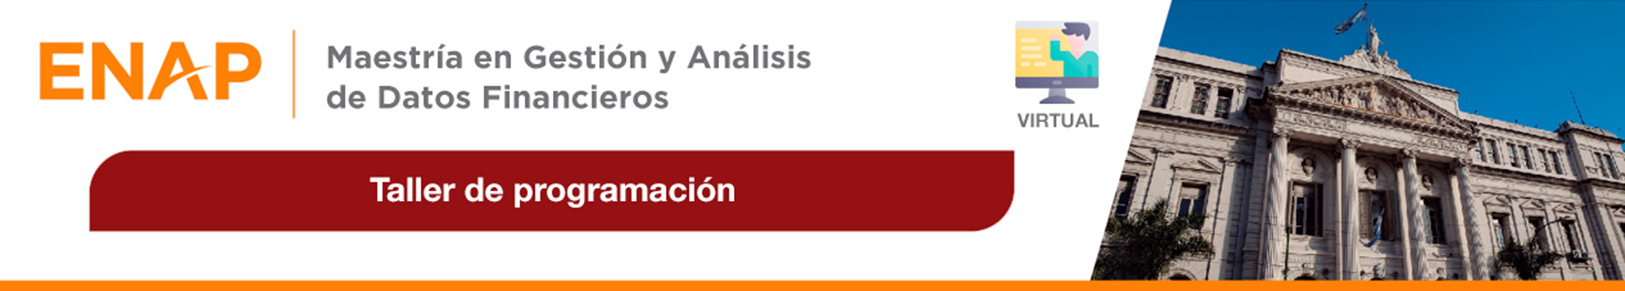

M71V MAESTRÍA EN GESTIÓN Y ANÁLISIS DE DATOS FINANCIEROS

TALLER DE PROGRAMACIÓN

Omar Brandán

Instalación de librerías

In [ ]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 31.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=be2c471dfeaaf5f3b7fa114394310a2ec28eb6fd0a1c2f345fe9365ebe58618a
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


Importación de librerías

In [ ]:
import pandas as pd
import numpy as np
import statistics as stats
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from ydata_profiling import ProfileReport

# 1) Importación y lectura de “200+ Financial Indicators of US stocks (2014-2018)"

## a) Lectura de "2017_Financial_Data.csv"

Conexión a API de Kaggle

In [ ]:
!kaggle datasets download cnic92/200-financial-indicators-of-us-stocks-20142018
!unzip /content/200-financial-indicators-of-us-stocks-20142018.zip

Dataset URL: https://www.kaggle.com/datasets/cnic92/200-financial-indicators-of-us-stocks-20142018
License(s): copyright-authors
 40% 6.00M/14.8M [00:00<00:00, 62.1MB/s]
100% 14.8M/14.8M [00:00<00:00, 87.9MB/s]
Archive:  /content/200-financial-indicators-of-us-stocks-20142018.zip
  inflating: 2014_Financial_Data.csv  
  inflating: 2015_Financial_Data.csv  
  inflating: 2016_Financial_Data.csv  
  inflating: 2017_Financial_Data.csv  
  inflating: 2018_Financial_Data.csv  


Lectura de archivo

In [ ]:
fin_data_17 = pd.read_csv('/content/2017_Financial_Data.csv')
fin_data_17.head()

Unnamed: 0       Revenue  Revenue Growth  Cost of Revenue  Gross Profit  \
0         PG  6.505800e+10         -0.0037     3.263800e+10  3.242000e+10   
1       VIPS  1.102060e+10          0.3525     8.557810e+09  2.462794e+09   
2         KR  1.153370e+11          0.0501     8.950200e+10  2.583500e+10   
3        RAD  2.292754e+10          0.1039     1.786283e+10  5.064707e+09   
4        GIS  1.561980e+10         -0.0570     1.005200e+10  5.567800e+09   

   R&D Expenses  SG&A Expense  Operating Expenses  Operating Income  \
0  0.000000e+00  1.865400e+10        1.865400e+10      1.376600e+10   
1  2.733452e+08  8.201852e+08        2.056136e+09      4.066575e+08   
2  0.000000e+00  1.916200e+10        2.238300e+10      3.452000e+09   
3  0.000000e+00  4.776995e+09        4.816124e+09      2.485830e+08   
4  0.000000e+00  2.888800e+09        3.069200e+09      2.498600e+09   

   Interest Expense  ...  Receivables growth  Inventory Growth  Asset Growth  \
0      4.650000e+08  ...              0.0505           -0.0195       -0.0529   
1      1.245995e+07  ...              0.9219            0.4764        0.5889   
2      5.220000e+08  ...             -0.0490            0.0637        0.0769   
3      2.000650e+08  ...              0.1063           -0.3365        0.0281   
4      2.951000e+08  ...              0.0509            0.0494        0.0046   

   Book Value per Share Growth  Debt Growth  R&D Expense Growth  \
0                       0.0012       0.0325              0.0000   
1                       1.5821       0.3805              0.2141   
2                       0.0071       0.1654              0.0000   
3                       0.0502      -0.5295              0.0000   
4                      -0.0943       0.1246              0.0000   

   SG&A Expenses Growth              Sector  2018 PRICE VAR [%]  Class  
0               -0.0156  Consumer Defensive            4.975151      1  
1                0.1920  Consumer Defensive          -56.320000      0  
2                0.0678  Consumer Defensive           -0.990449      0  
3                0.0427  Consumer Defensive          -66.666666      0  
4               -0.0738  Consumer Defensive          -31.280412      0  

[5 rows x 225 columns]

## b) Dimensiones del DataFrame

Visualizar la cantidad de filas y columnas del DataFrame

In [ ]:
fin_data_17.shape

(4960, 225)

c) Renombrar primera columna a EMPRESA

In [ ]:
fin_data_17.rename(columns={'Unnamed: 0': 'EMPRESA'}, inplace=True)

# 2) Tipo de variables y valores faltantes

## e) Recategorización de variables tipo object a numéricas

In [ ]:
fin_data_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4960 entries, 0 to 4959
Columns: 225 entries, EMPRESA to Class
dtypes: float64(222), int64(1), object(2)
memory usage: 8.5+ MB


In [ ]:
fin_data_17.dtypes.value_counts()

float64    222
object       2
int64        1
Name: count, dtype: int64

In [ ]:
fin_data_17.columns[fin_data_17.dtypes == 'object']

Index(['EMPRESA', 'Sector'], dtype='object')

Verificar registros únicos de la columna Sector.

In [ ]:
pd.unique(fin_data_17['Sector'])

array(['Consumer Defensive', 'Basic Materials', 'Healthcare',
       'Consumer Cyclical', 'Industrials', 'Real Estate',
       'Communication Services', 'Energy', 'Financial Services',
       'Utilities', 'Technology'], dtype=object)

Como cada registro del dataset corresponde a una empresa, se busca saber si hay valores repetidos. No los hay ya que son 4.960 casos únicos, igual que el número de filas.

In [ ]:
pd.unique(fin_data_17['EMPRESA']).size

4960

Recategorizar columnas EMPRESA y Sector, que son de tipo object, a numéricas.

In [ ]:
fin_data_17['EMPRESA'] = fin_data_17['EMPRESA'].astype('category').cat.codes
fin_data_17['Sector'] = fin_data_17['Sector'].astype('category').cat.codes

Verificar cambios realizados.

In [ ]:
fin_data_17[['EMPRESA', 'Sector']].head()

EMPRESA  Sector
0     3534       3
1     4676       3
2     2557       3
3     3740       3
4     1909       3

In [ ]:
fin_data_17.dtypes.value_counts()

float64    222
int16        1
int8         1
int64        1
Name: count, dtype: int64

Visualizar cantidad de casos existentes por cada categoría de Sector.

In [ ]:
fin_data_17.groupby(['Sector']).Sector.value_counts()

Sector
0      282
1       94
2      520
3      199
4      266
5     1247
6      718
7      595
8      264
9      665
10     110
Name: count, dtype: int64

Visualizar cantidad de casos existentes por cada categoría de EMPRESA.

In [ ]:
fin_data_17.groupby(['EMPRESA']).EMPRESA.value_counts()

EMPRESA
0       1
1       1
2       1
3       1
4       1
       ..
4955    1
4956    1
4957    1
4958    1
4959    1
Name: count, Length: 4960, dtype: int64

## f) Valores faltantes

Comprobar si existen valores faltantes.

In [ ]:
fin_data_17.isnull().any().any()

True

Cantidad de registros con valores nulos.

In [ ]:
fin_data_17.isnull().any(axis=1).sum()

4960

Confirmar que en todas las filas hay valores nulos.

In [ ]:
fin_data_17.isnull().any(axis=1).sum() == len(fin_data_17)

True

Crear DataFrame de casos nulos por variable.

In [ ]:
pd.set_option("display.max_rows", 999)
casos_faltantes = fin_data_17.isnull().sum()
null_df = pd.DataFrame(casos_faltantes, columns=['CASOS'])
null_df['VARIABLE'] = null_df.index
null_df = null_df.reset_index(drop=True)
null_df = null_df[['VARIABLE', 'CASOS']]
null_df

VARIABLE  CASOS
0                                       EMPRESA      0
1                                       Revenue    525
2                                Revenue Growth    724
3                               Cost of Revenue    679
4                                  Gross Profit    534
5                                  R&D Expenses    787
6                                  SG&A Expense    661
7                            Operating Expenses    661
8                              Operating Income    504
9                              Interest Expense    677
10                          Earnings before Tax    579
11                           Income Tax Expense    635
12             Net Income - Non-Controlling int    835
13                Net Income - Discontinued ops    835
14                                   Net Income    620
15                          Preferred Dividends    835
16                               Net Income Com    582
17                                          EPS    546
18                                  EPS Diluted    540
19                     Weighted Average Shs Out    548
20               Weighted Average Shs Out (Dil)    687
21                           Dividend per Share    835
22                                 Gross Margin    529
23                                EBITDA Margin    802
24                                  EBIT Margin    655
25                                Profit Margin    802
26                        Free Cash Flow margin    840
27                                       EBITDA    666
28                                         EBIT    592
29                          Consolidated Income    620
30                   Earnings Before Tax Margin    529
31                            Net Profit Margin    661
32                    Cash and cash equivalents    514
33                       Short-term investments    721
34              Cash and short-term investments    667
35                                  Receivables    499
36                                  Inventories    694
37                         Total current assets    652
38              Property, Plant & Equipment Net    644
39               Goodwill and Intangible Assets    580
40                        Long-term investments    702
41                                   Tax assets    727
42                     Total non-current assets   1536
43                                 Total assets    548
44                                     Payables    642
45                              Short-term debt    707
46                    Total current liabilities    650
47                               Long-term debt    501
48                                   Total debt    653
49                             Deferred revenue    728
50                              Tax Liabilities    724
51                          Deposit Liabilities    827
52                Total non-current liabilities   1538
53                            Total liabilities    570
54                   Other comprehensive income    648
55                  Retained earnings (deficit)    483
56                    Total shareholders equity    566
57                                  Investments    729
58                                     Net Debt   1951
59                                 Other Assets   1911
60                            Other Liabilities    600
61                  Depreciation & Amortization    613
62                     Stock-based compensation    666
63                          Operating Cash Flow    520
64                          Capital Expenditure    619
65                   Acquisitions and disposals    776
66               Investment purchases and sales    609
67                          Investing Cash flow    580
68                 Issuance (repayment) of debt    658
69                Issuance (buybacks) of shares    737
70                            Dividend payments    814
71                          Financing Cash Flow    470
72              Effect o

# 3) Nuevo DataFrame con variables de interés

Crear nuevo DataFrame con columnas EMPRESA, Revenue, Gross Profit, EBITDA, EBIT, ROE, Sector y Class de "fin_data_17".

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
data_1 = fin_data_17[['EMPRESA', 'Revenue', 'Gross Profit', 'EBITDA', 'EBIT', 'ROE', 'Sector', 'Class']]
data_1.head(3)

EMPRESA         Revenue   Gross Profit         EBITDA           EBIT  ROE  \
0     3534  65058000000.00 32420000000.00 21674000000.00 18854000000.00 0.27   
1     4676  11020603536.88  2462793530.83   562256045.95   401788089.48 0.14   
2     2557 115337000000.00 25835000000.00  5794000000.00  3454000000.00 0.29   

   Sector  Class  
0       3      1  
1       3      0  
2       3      0

## h) Renombrar la columna Gross Profit a Gross_Profit

In [ ]:
warnings.filterwarnings('ignore')
data_1.rename(columns = {'Gross Profit': 'Gross_Profit'}, inplace=True)
data_1.head()

EMPRESA         Revenue   Gross_Profit         EBITDA           EBIT  ROE  \
0     3534  65058000000.00 32420000000.00 21674000000.00 18854000000.00 0.27   
1     4676  11020603536.88  2462793530.83   562256045.95   401788089.48 0.14   
2     2557 115337000000.00 25835000000.00  5794000000.00  3454000000.00 0.29   
3     3740  22927540000.00  5064707000.00   655922000.00   248556000.00 0.01   
4     1909  15619800000.00  5567800000.00  3211400000.00  2607800000.00 0.38   

   Sector  Class  
0       3      1  
1       3      0  
2       3      0  
3       3      0  
4       3      0

## i) Medidas y gráficos estadísticos

### Gráficos

#### Boxplot

Decidí comenzar con un boxplot antes de ver medidas estadísticas puntuales para tener noción de cómo están distribuidos los datos.

Gráfico de boxplot con Seaborn de la variable ROE y guardarlo.

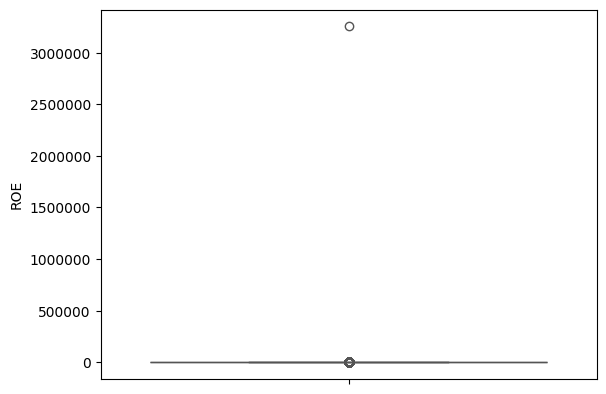

In [ ]:
plt.ticklabel_format(style='plain')
sns.boxplot(y=data_1['ROE'], palette='muted')
plt.savefig("boxplot_roe.png", dpi=300, bbox_inches='tight')

Mostrar valores mayores a 1 y menores a -1, posiblemente outliers.

In [ ]:
pd.set_option("display.max_rows", None)
pd.options.display.float_format = '{:.4f}'.format
data_1[['EMPRESA', 'ROE']][(data_1['ROE']> 1) | (data_1['ROE'] < -1)].round(4)

EMPRESA          ROE
15       2532       3.6216
27        931     -33.7333
44       1668       9.5286
73        962       1.2934
81        679      -4.3338
102      2610      -1.3958
152      2603      51.9338
161      4914      -1.7014
175      1376      -1.0281
177      1807      -3.1133
189      3780     -36.1673
201       171      -2.3206
217       673      -2.6201
222      2760     -10.0566
245      1852       1.1289
266      2067       1.1017
330      3371      -2.2984
337       692       1.7997
356      2013       1.6876
401      3829      -1.9617
446       889       1.9346
460      2441      -1.3030
465      3579      51.9784
467      4003      -1.8567
470      4115      -1.6333
485        17       1.0416
491       808       9.0429
501      2010     -22.5294
506      2288       5.3653
511      1479      -4.1978
512      3367      19.0053
521      3266       1.8064
522      4418       2.5056
527      1201       3.2060
528      4376       4.7891
535      3166      -1.1009
541      2293       1.0391
550      4712     -36.3241
553      2165      -1.5059
565       322      -2.0593
578       233       1.0425
580      3113      -7.3513
593       227       1.5183
595      4685      -1.5284
612      2183       6.1970
628      4375      -1.7685
634       397       1.5952
637      2254      -4.8635
638      3376      -2.0054
658      1243      -2.0265
659       432      -5.6273
664      4000      -8.1328
667       120       1.5919
670      2244     -21.9924
671      2804     -28.4327
673      3681       2.5813
674      3466      -5.4774
675      2373     -11.8742
680      3434      -1.0707
685      2682       5.2975
696      3717      -1.1483
701      1223      -1.1368
713      1080      -2.2222
714      3658      -1.0799
717      3281      -1.0130
728       856      -1.1519
733      2500     -45.3777
740       102      -1.0701
748      3560      -1.5316
749        26      -1.7995
754       890      -7.4840
761       366      -1.9458
765      2736      -1.8017
766        73      -1.3533
769      3940       9.5252
774       552     -16.6768
777      4235      -1.4410
780        86      -1.7220
783       843      -1.5559
786      3774      -1.0504
795      3727       3.5312
799      1132      -1.8645
803       184      -1.4747
821       956      -2.7539
828      1084      -4.5889
833      4044      -2.3179
844      4480      -2.0750
845      2654      -1.3016
847      4732      -1.1754
850        71      -1.0849
854      3233      -1.0861
862      1948       9.3736
865      4509     -46.5881
868      1206      -1.1634
873      1375      11.2891
879      3653      -1.5888
895      4324      -1.1246
897       367      -1.4568
898      3312      10.7346
901      1657      -1.8030
903       578      -1.0842
907      1444      -1.8847
910       929      -1.5077
912      3331      -2.4242
915      3588       2.8326
919      3899      -6.6677
920      2706      -2.6740
921      4314      -2.4779
924      3378       2.0607
925      2405      -1.2727
929      1953      -1.1337
930      1834      30.6321
934      4680      14.2150
937      2814      -2.3024
938      3204      21.3409
940      4953      -4.1295
944      2748       4.9025
946       360      -1.3792
948      3589      -3.3244
951      4428       1.0579
952      4895       2.5226
953      3275      -2.6454
955      3688      -1.7812
956      3977      -1.1705
957      3250      -5.4148
959      2935      -2.3900
960       286      -1.1412
962      4128      -1.6458
964       863      -1.2652
968      3993      -1.2607
972      3759      -1.2616
976      3332      -4.4004
979      1632      -1.2721
989      2963      -1.1446
995       425      -1.7314
996      2180      -1.6066
998      2794      -1.4725
999      3791      -1.7360
1004     2221      -1.6302
1005     4703      -1.4832
1011      666       4.6222
1015     3654      -1.1095
1017      747      -2.3206
1019     2999      -1.4498
1023     3231      -3.0942
1025     3769      -1.0106
1026     4156      -1.1278
1031      

Se verifica qué proporción de los datos son outliers.

In [ ]:
outliers_roe = data_1['ROE'][(data_1['ROE'] > 1) | (data_1['ROE'] < -1)]

n_roe = len(data_1['ROE'])

prop_out_roe = outliers_roe.value_counts().sum() / n_roe * 100

print(f"Proporción de datos_outliers: {round(prop_out_roe,2)}%")

Proporción de datos_outliers: 7.34%


Visualizar y guardar boxplot tomando valores entre -1 y 1, que son coherentes para la variable ROE.

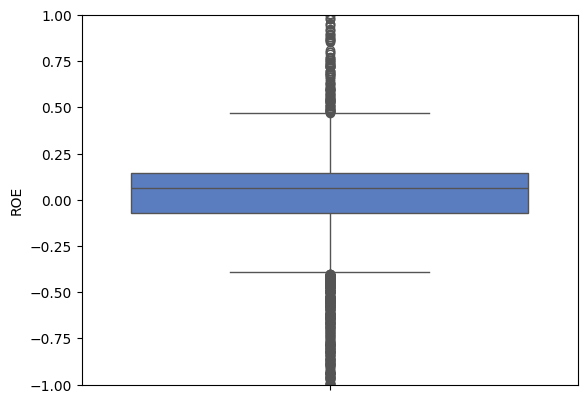

In [ ]:
plt.ticklabel_format(style='plain')
sns.boxplot(y=data_1['ROE'], palette='muted')
plt.ylim(-1, 1)
plt.savefig("boxplot_roe_lim.png", dpi=300, bbox_inches='tight')

#### Histograma

Graficar histograma usando librería Seaborn, previo a ello se ignoran las advertencias, se quitan las notaciones científicas y se define un fondo blanco.

(-10.0, 10.0)

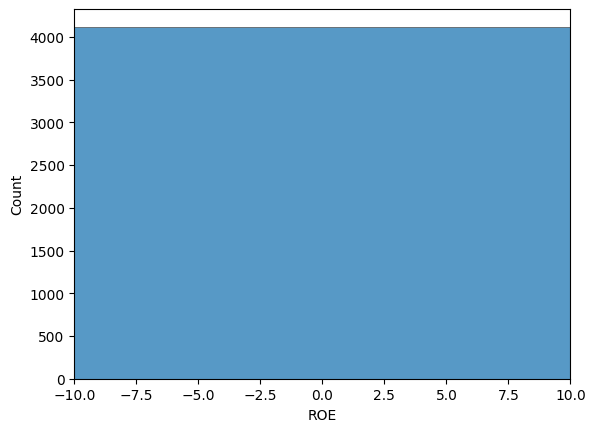

In [ ]:
warnings.filterwarnings('ignore')
plt.ticklabel_format(style='plain')
sns.set_theme(style="white")
sns.histplot(x=data_1['ROE'], palette="light:m_r", edgecolor=".3",linewidth=.5, bins=10000)
plt.xlim(-10,10)

### Tamaño de muestra

In [ ]:
n=len(data_1)
print(f"El tamaño de la muestra es {n} registros")

El tamaño de la muestra es 4960 registros


### Medidas de posición

#### Máximo

In [ ]:
max = data_1['ROE'].max()
print(f"El valor máximo de ROE es {max:.2f}")

El valor máximo de ROE es 3254590.33


#### Mínimo

In [ ]:
min = data_1['ROE'].min()
print(f"El valor mínimo de ROE es {min:.2f}")

El valor mínimo de ROE es -46.59


### Medidas de tendencia central

#### Media Aritmética

In [ ]:
media_muestral=data_1['ROE'].mean()
print(f"La media aritmética de ROE es {media_muestral:.2f}")

La media aritmética de ROE es 790.10


#### Mediana

In [ ]:
mediana=data_1['ROE'].median()
print(f"La mediana de ROE es {mediana:.2f}")

La mediana de ROE es 0.07


#### Moda

In [ ]:
multimodal=stats.multimode(data_1['ROE'])
print(f"Los valores multimodales de ROE son {multimodal}")

Los valores multimodales de ROE son [0.0731, 0.1045, 0.0771]


### Medidas de Tendencia No Central

#### Rango

In [ ]:
rango= max - min
print(f"El rango de ROE es {rango:.2f}")

El rango de ROE es 3254636.92


#### Varianza

In [ ]:
varianza=data_1['ROE'].var()
print(f"La varianza de ROE es {varianza:.2f}")

La varianza de ROE es 2571584975.62


#### Desvío

In [ ]:
desvio=data_1['ROE'].std()
print(f"El desvío de ROE es {desvio:.2f}")

El desvío de ROE es 50710.80


#### Coeficiente de variación

In [ ]:
cv = desvio / media_muestral
print(f"El coeficiente de variación de ROE es {cv:.2f}")

El coeficiente de variación de ROE es 64.18


### Medidas de Forma

#### Coeficiente de Asimetría

In [ ]:
ca = data_1['ROE'].skew()
print(f"El coeficiente de asimetría de ROE es {ca:.2f}")

El coeficiente de asimetría de ROE es 64.18


#### Coeficiente de Curtosis

In [ ]:
cc = data_1['ROE'].kurtosis()
print(f"El coeficiente de curtosis de ROE es {cc:.2f}")

El coeficiente de curtosis de ROE es 4119.00


#### Correlación de Pearson

In [ ]:
data_1.corr()

EMPRESA  Revenue  Gross_Profit  EBITDA    EBIT     ROE  Sector  \
EMPRESA        1.0000   0.0066        0.0093  0.0021 -0.0041  0.0050 -0.0224   
Revenue        0.0066   1.0000        0.7819  0.7368  0.3848 -0.0039 -0.0446   
Gross_Profit   0.0093   0.7819        1.0000  0.9105  0.7366 -0.0041 -0.0597   
EBITDA         0.0021   0.7368        0.9105  1.0000  0.8621 -0.0040 -0.0557   
EBIT          -0.0041   0.3848        0.7366  0.8621  1.0000 -0.0037 -0.0410   
ROE            0.0050  -0.0039       -0.0041 -0.0040 -0.0037  1.0000 -0.0025   
Sector        -0.0224  -0.0446       -0.0597 -0.0557 -0.0410 -0.0025  1.0000   
Class         -0.0129   0.0099        0.0078  0.0029 -0.0061 -0.0098  0.1058   

               Class  
EMPRESA      -0.0129  
Revenue       0.0099  
Gross_Profit  0.0078  
EBITDA        0.0029  
EBIT         -0.0061  
ROE          -0.0098  
Sector        0.1058  
Class         1.0000

### Resumen de medidas

In [ ]:
Medidas=pd.DataFrame({ 'N': [n],'Media Muestral': [media_muestral],
                     'Mediana': [mediana], 'Valores Multimodales': [multimodal],
                     'Máximo': [max], 'Mínimo': [min],
                     'Rango': [rango], 'Varianza Muestral': [varianza], 'Desvío Muestral': [desvio], 'Coeficiente de Variación': [cv],
                      'Coeficiente de Asimetría': [ca], 'Coefiente de Curtosis': [cc]
                     }).transpose()
Medidas=Medidas.reset_index(inplace=False)
Medidas.columns=['Estadísticas', 'Valores']
pd.options.display.float_format = '{:.2f}'.format
Medidas

Estadísticas                   Valores
0                          N                      4960
1             Media Muestral                    790.10
2                    Mediana                      0.07
3       Valores Multimodales  [0.0731, 0.1045, 0.0771]
4                     Máximo                3254590.33
5                     Mínimo                    -46.59
6                      Rango                3254636.92
7          Varianza Muestral             2571584975.62
8            Desvío Muestral                  50710.80
9   Coeficiente de Variación                     64.18
10  Coeficiente de Asimetría                     64.18
11     Coefiente de Curtosis                   4119.00

## j) Profiling Report

In [ ]:
ProfileReport(data_1, title="Profiling Report")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# 4) Valores faltantes

## k) Verificar existencia de valores faltantes

In [ ]:
data_1.isnull().any().any()

True

## l) Tratamiento de valores faltantes

Se verifica la cantidad de valores faltantes por columna.

In [ ]:
casos_faltantes = data_1.isnull().sum()
nulos = pd.DataFrame(casos_faltantes, columns=['CASOS'])
nulos['VARIABLE'] = nulos.index
nulos = nulos.reset_index(drop=True)
nulos = nulos[['VARIABLE', 'CASOS']]
nulos

VARIABLE  CASOS
0       EMPRESA      0
1       Revenue    525
2  Gross_Profit    534
3        EBITDA    666
4          EBIT    592
5           ROE    841
6        Sector      0
7         Class      0

Se crean columnas que empiecen con "MARCA_ " por cada columna con valores faltantes. Si es nulo el valor de la columna origina, se le asigna un 0 a la nueva columna; si no es nulo, un 1.

In [ ]:
columnas_nulos = ['Revenue', 'Gross_Profit', 'EBITDA', 'EBIT', 'ROE']
columnas_marca = [f"MARCA_{col.upper()}" for col in columnas_nulos]

for col, marca_col in zip(columnas_nulos, columnas_marca):
    data_1[marca_col] = np.where(data_1[col].isna(), 1, 0)

data_1.sample(3)

EMPRESA       Revenue  Gross_Profit       EBITDA         EBIT  ROE  \
3274     1946   83417000.00   82723000.00          NaN          NaN  NaN   
3210     4048 2469984000.00 1124910000.00 338422000.00 286322000.00 0.10   
2495     1374   30143000.00   27465000.00  10788000.00  10788000.00 0.06   

      Sector  Class  MARCA_REVENUE  MARCA_GROSS_PROFIT  MARCA_EBITDA  \
3274       5      0              0                   0             1   
3210       5      1              0                   0             0   
2495       8      0              0                   0             0   

      MARCA_EBIT  MARCA_ROE  
3274           1          1  
3210           0          0  
2495           0          0

Se verifica si la cantidad de ceros en las nuevas columnas es la misma a la cantidad de valores nulos en la columna original respectiva.

In [ ]:
columnas_marca = [col for col in data_1.columns if col.startswith('MARCA')]
data_1[columnas_marca].apply(pd.value_counts).T

0    1
MARCA_REVENUE       4435  525
MARCA_GROSS_PROFIT  4426  534
MARCA_EBITDA        4294  666
MARCA_EBIT          4368  592
MARCA_ROE           4119  841

Efectivamente son las mismas cantidades.